In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import  fetch_covtype
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')

In [5]:
cov_data = fetch_covtype()
cov_data

{'DESCR': 'Forest covertype dataset.\n\nA classic dataset for classification benchmarks, featuring categorical and\nreal-valued features.\n\nThe dataset page is available from UCI Machine Learning Repository\n\n    http://archive.ics.uci.edu/ml/datasets/Covertype\n\nCourtesy of Jock A. Blackard and Colorado State University.\n',
 'data': array([[  2.59600000e+03,   5.10000000e+01,   3.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.59000000e+03,   5.60000000e+01,   2.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.80400000e+03,   1.39000000e+02,   9.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.38600000e+03,   1.59000000e+02,   1.70000000e+01, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.38400000e+03,   1.70000000e+02,   1.50000000e+01, ...,
           0.00000000e+00,   0.00000000e+00,   0.00

In [6]:
cov_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon',
            'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [7]:
for i in range(1,5):
    x = 'Wilderness_Area_'+str(i)
    cov_cols.append(x)

In [8]:
for i in range(1,41):
    x = 'Soil_Type'+str(i)
    cov_cols.append(x)

In [9]:
len(cov_cols)

54

In [10]:
cov = pd.DataFrame(cov_data.data, columns = cov_cols)
cover_type = pd.DataFrame(cov_data.target, columns = ['cov_type'])
#cov.columns
#cover_type

## 2.1

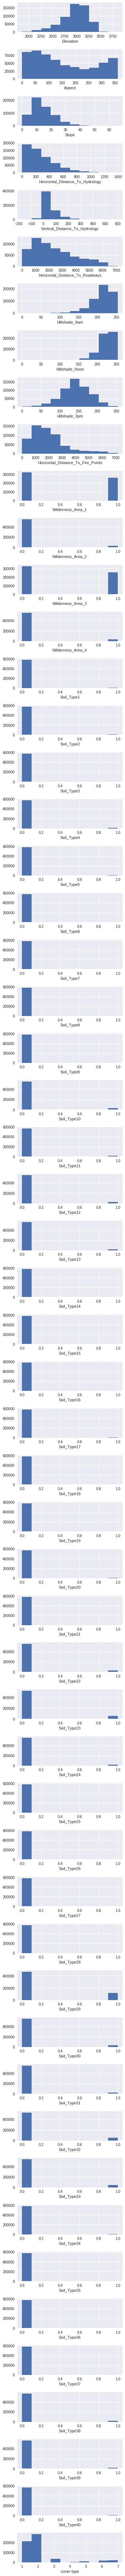

In [11]:
fig = plt.figure(figsize=(5,100))

for i in range(1,55):
    #print (i)
    fig.add_subplot(55,1,i)
    plt.hist(cov.iloc[:,i-1])
    plt.xlabel(cov_cols[i-1])
    plt.tight_layout()

fig.add_subplot(55,1,55)
plt.hist(cover_type.iloc[:,0])
plt.xlabel('cover type')
plt.tight_layout()

plt.show()


2.2 Split data into training and test set. Evaluate Logistic Regression, linear support vector
machines and nearest centroids using cross-validation. How different are the results? How does
scaling the data with StandardScaler influence the results?

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cov, cover_type, random_state=0)

In [21]:
lr = LogisticRegressionCV(multi_class='multinomial', dual=False,solver='lbfgs', tol=0.001)
lr_score = np.mean(cross_val_score(lr, X_train, y_train, cv = 3)) 
#logistic regression with 3 folds 
#svm_score = np.mean(cross_val_score(LinearSVC(dual=False,tol=0.001), X_train, y_train, cv=3))#svm with 3 folds
#nc_score = np.mean(cross_val_score(NearestCentroid(), X_train, y_train, cv=3))#nearest centroid with 3 folds

IndexError: too many indices for array

In [ ]:
#scores output
print ('Mean CV score - Logistic Regression = {:.3f}'.format(lr_score))
print ('Mean CV score - linear support vector machines = {:.3f}'.format(svm_score))
print ('Mean CV score - nearest centroids = {:.3f}'.format(nc_score))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) #fitting scaler
X_train_scaled = scaler.transform(X_train) #transforming train data

X_test_scaled = scaler.transform(X_test) #transforming test data

In [ ]:
#logistic regression cv on scaled data
lr_score2 = np.mean(cross_val_score(LogisticRegressionCV(multi_class='multinomial', dual=False,
                                                         solver='lbfgs', tol=0.001,n_jobs=-1), 
                                    X_train_scaled, y_train, cv = 3))
#svm with 3 folds
svm_score2 = np.mean(cross_val_score(LinearSVC(dual=False,tol=0.001), X_train_scaled, y_train, cv=3))
#nearest centroid with 3 folds
nc_score2 = np.mean(cross_val_score(NearestCentroid(), X_train_scaled, y_train, cv=3))

In [ ]:
print ('Mean CV score - Logistic Regression = {:.3f}'.format(lr_score2))
print ('Mean CV score - linear support vector machines = {:.3f}'.format(svm_score2))
print ('Mean CV score - nearest centroids = {:.3f}'.format(nc_score2))

# 2.3

Tune the parameters using GridSearchCV. Do the results improve?
Visualize the performance as function of the parameters for all three models.

In [ ]:
#grid search for logistic regression
param_grid_lr = [{'C': [0.01, 1, 10, 100, 1000]}]
grid_lr = GridSearchCV(LogisticRegressionCV(multi_class='multinomial', dual=False,solver='lbfgs', tol=0.001,
                                            n_jobs=-1), param_grid_lr, cv = 3)
grid_lr.fit(X_train,y_train)

In [ ]:
print('Logistic Regression - Best Parameters :',grid_lr.best_params_)
print('Logistic Regression - Best Score :{:.4f}'.format(grid_lr.best_score_))

In [ ]:
results_lr = pd.DataFrame(grid_lr.cv_results_)
results_lr

In [ ]:
#grid search for svc
param_grid_svc = [{'C': [0.01, 1, 10, 100, 1000]}]
grid_svc = GridSearchCV(LinearSVC(dual=False, tol=0.001), param_grid_svc, cv = 3)
grid_svc.fit(X_train,y_train)

In [ ]:
print('Linear SVC - Best Parameters :',grid_svc.best_params_)
print('Linear SVC - Best Score :{:.4f}'.format(grid_svc.best_score_))

In [ ]:
results_svc = pd.DataFrame(grid_svc.cv_results_)
results_svc

In [ ]:
#grid search for nearest centroid
param_grid_nc = [{'shrink_threshold': [0,0.5,1,10, 15, 20, 50, 100]}]
grid_nc = GridSearchCV(NearestCentroid(), param_grid_nc, cv = 3)
grid_nc.fit(X_train,y_train)

In [ ]:
print('Nearest Centroid - Best Parameters :',grid_nc.best_params_)
print('Nearest Centroid - Best Score :{:.4f}'.format(grid_nc.best_score_))

In [ ]:
results_nc = pd.DataFrame(grid_nc.cv_results_)
results_nc

# 2.4

Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(cov, cover_type, random_state=42)

In [ ]:
param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 42)
grid_lr41a = GridSearchCV(LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001), param_grid, cv=kf)
grid_lr41a.fit(X_train,y_train)
df41a = pd.DataFrame(grid_lr41a.cv_results_) 
df41a

In [ ]:
param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr41b = GridSearchCV(LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001), param_grid, cv=kf)
grid_lr41b.fit(X_train,y_train)
df41b = pd.DataFrame(grid_lr41b.cv_results_) 
df41b

In [ ]:

param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr41c = GridSearchCV(LogisticRegression(multi_class='multinomial', dual=False, solver='lbfgs', tol=0.001), param_grid, cv=kf)
grid_lr41c.fit(X_train1,y_train1)
df41c = pd.DataFrame(grid_lr41c.cv_results_) 
df41c

In [ ]:
param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 42)
grid_lr42a = GridSearchCV(LinearSVC(dual=False, tol=0.001), param_grid, cv=kf)
grid_lr42a.fit(X_train,y_train)
df42a = pd.DataFrame(grid_lr42a.cv_results_) 
df42a

In [ ]:
param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr42b = GridSearchCV(LinearSVC(dual=False, tol=0.001), param_grid, cv=kf)
grid_lr42b.fit(X_train,y_train)
df42b = pd.DataFrame(grid_lr42b.cv_results_) 
df42b

In [ ]:
param_grid = [{'C': [0.01, 1, 10, 100, 1000]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr42c = GridSearchCV(LinearSVC(dual=False, tol=0.001), param_grid, cv=kf)
grid_lr42c.fit(X_train1,y_train1)
df42c = pd.DataFrame(grid_lr42c.cv_results_) 
df42c

In [ ]:
param_grid = [{'shrink_threshold': [0,0.5,1,10, 15, 20, 50, 100]}]
kf = KFold(shuffle=True, random_state = 42)
grid_lr43a = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid_lr43a.fit(X_train,y_train)
df43a = pd.DataFrame(grid_lr43a.cv_results_) 
df43a

In [ ]:
param_grid = [{'shrink_threshold': [0,0.5,1,10, 15, 20, 50, 100]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr43b = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid_lr43b.fit(X_train,y_train)
df43b = pd.DataFrame(grid_lr43b.cv_results_) 
df43b

In [ ]:
param_grid = [{'shrink_threshold': [0,0.5,1,10, 15, 20, 50, 100]}]
kf = KFold(shuffle=True, random_state = 24)
grid_lr43c = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid_lr43c.fit(X_train1,y_train1)
df43c = pd.DataFrame(grid_lr43c.cv_results_) 
df43c

In [ ]:
d en . kmew